In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from tensorflow import keras
from keras.wrappers.scikit_learn import KerasClassifier

Import package yang dibutuhkan

In [ ]:
# Package untuk mengabaikan warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# No 1

## Data Exploration

In [ ]:
# Membaca .txt tentang kolom - kolom dataset yang diberikan pada soal
with open('/content/about dataset.txt', 'r') as f:
  print(f.read())

About datasets
1. age - age in years 
2. sex - sex (1 = male; 0 = female) 
3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic) 
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
5. chol - serum cholestoral in mg/dl 
6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false) 
7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy) 
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping) 
12. ca - number of major vessels (0-3) colored by flourosopy 
13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect 
14. output - the predicted attribute - diagnosis of heart disease (0 = less chance of heart attack, 1 = higher chance of heart attack)



In [ ]:
heart_data = pd.read_csv('/content/heart.csv')  # inisiasi data heart.csv pada variabel heart_data
heart_data.head()                               # melihat 5 baris awal heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.info() # cek jumlah baris, kolom, tipe data, dan null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Didapatkan bahwa heart_data memiliki 303 baris dan 14 kolom, dimana tiap kolomnya adalah bertipe numerik, serta tidak terdapat null values pada data

In [ ]:
heart_data.output.unique()  # melihat banyaknya class dan apa saja class pada heart_data 

array([1, 0])

In [ ]:
heart_data.output.value_counts()  # cek apakah data balanced atau tidak

1    165
0    138
Name: output, dtype: int64

Karena perbedaan data dengan value 1 dan data dengan value 0 tidak terlalu besar (cukup seimbang), maka saya menyimpulkan dataset heart_data cukup balanced 

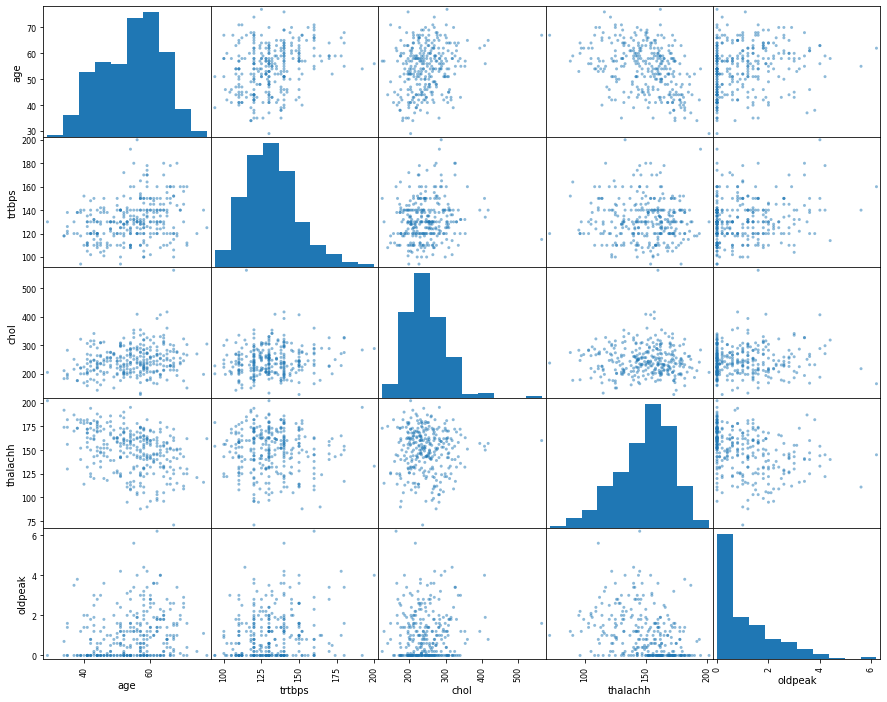

In [ ]:
pd.plotting.scatter_matrix(heart_data[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']], figsize=(15,12)) # plot data yang numerik dan kontinu
plt.show()

Plot diatas saya ingin melihat korelasi antara fitur - fitur yang numerik dan kontinu, melalui scatter plot, serta range nilai datanya melalui histogramnya.

Melalui scatter plot dapat kita lihat bahwa kita belum bisa menyimpulkan  korelasi antara fitur - fitur, karena persebarannya sebagian besar sangat acak. Melalui histogram dapat dilihat bahwa range nilainya cukup berjauhan (oldpeak 0 sampai 6, sedangkan chol 100 sampai 500+), sehingga perlu dilakukan standarisasi pada data numerik nantinya dengan StandardScaler

## Split train dan test set

In [ ]:
X = heart_data.drop('output', axis=1).values # menyimpan predictor variable pada X dalam bentuk numpy array
y = heart_data['output'].values              # menyimpan target variable pada y dalam bentuk numpy array

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # split train dan test set, dengan test size sebesar 20% dari banyak data aslinya
X_train.shape, X_test.shape, y_train.shape, y_test.shape                  # cek banyaknya train dan test set

((242, 13), (61, 13), (242,), (61,))

Data displit dengan perbandingan 80(train):20(test). Diperoleh 242 training set dan 61 test set. Karena pada training set jumlah sample cukup sedikit (hanya 242) maka saya tidak mesplit lagi menjadi validation set. Namun, nantinya akan digunakan metode cross validation

## Data preprocessing

In [ ]:
std_scale = StandardScaler()
X_train_prepared = std_scale.fit_transform(X_train) # standarisasi X_train dan disimpan pada variabel X_train_prepared

Karena pada visualisasi sebelumnya, range nilai antara predictor variabel cukup berbeda, maka perlu dilakukan standarisasi.

Standarisasi diatas saya lakukan terpisah antara X_train dan X_test, karena X_test saya anggap sebagai data baru yang belum pernah dilihat sebelumnya. Sehingga std_scale nantinya hanya mentransform (tidak memfit) X_test, dan fit hanya dilakukan pada X_train

## Modelling

In [ ]:
# Function untuk membuat model
def build_model(n_neurons=(10,10), learning_rate=1e-3, activation_hidden='sigmoid'):
  model = keras.models.Sequential()                                                     # inisiasi arsitektur model
  model.add(keras.layers.InputLayer(input_shape=[13]))                                  # input layer
  for i in range(len(n_neurons)):                                                       # hidden layer
    model.add(keras.layers.Dense(n_neurons[i], activation=activation_hidden))
  model.add(keras.layers.Dense(1, activation='sigmoid'))                                # output layer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)                        # optimizer yang akan digunakan
  model.compile(loss='binary_crossentropy', optimizer=optimizer,                        # compiling model
                metrics='accuracy')
  return model

Didefinisikan function build_model untuk membuat model, yang mengambil 3 argumen, yaitu n_neurons (jumlah hidden layer dan jumlah neuron pada masing - masing hidden layer, berbentuk tuple, dimana length dari tuple adalah banyaknya hidden layer dan nilai-nilai pada tuple adalah neurons pada hidden layer ke-index yang bersesuaian), learning_rate (learning rate saat proses learning algorithm), dan activation_hidden (fungsi aktivasi di hidden layer)

Pada function dibuat arsitektur model Sequential dengan input layer yang memiliki 13 neurons (karena terdapat 13 fitur pada predictor variable), hidden layer sebanyak yang didefinisikan user, dan output layer yang memiliki 1 neuron dengan fungsi aktivasi sigmoid. Model menggunakan cost function binary cross entropy/log loss, optimizer adam, dan metrik evaluasinya adalah akurasi.

Inisiasi awal model menggunakan 2 hidden layer dengan 10 neurons pada masing - masing hidden layer, learning rate = 0.001, fungsi aktivasi di hidden layer = sigmoid.

In [ ]:
# Wrapper model agar dapat dilakukan hyperparameter tuning dengan library scikit-learn
model = KerasClassifier(build_model, epochs=50, verbose=0)

Untuk tuning hyperparameter saya menggunakan library dari scikit-learn, yaitu RandomizedSearchCV (metode hyperparameter tuning randomized search), karena menurut saya lebih mudah digunakan, tetapi kelemahannya model perlu di-wrap terlebih dahulu dengan KerasClassifier (atau KerasRegressor untuk model regresi) sehingga nantinya dapat dituning dengan RandomizedSearchCV.

In [ ]:
# Cross validation untuk melihat akurasi yang didapat dari model dengan hyperparameter sebelum dituning
cv_mean_accuracy = cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='accuracy').mean()
cv_mean_accuracy

0.8183673469387756

Dengan 2 hidden layer dimana terdapat 10 neurons pada masing - masing hidden layer, learning rate 0.001, fungsi aktivasi di hidden layer = sigmoid, dan epochs = 50, diperoleh akurasi sebesar 81,83%

### Hyperparameter Tuning

In [ ]:
# tuning hyperparameter dengan randomized search
params = {'n_neurons':[(10,), (10,10), (15,), (15,10), (20,), (20,15),      # list parameter yang akan ditune
                       (30,), (30,20), (50,), (50,30), (70,), (70,50), 
                       (100,), (100,70)],
          'learning_rate':[1e-4, 1e-3, 1e-2],
          'activation_hidden':['relu','sigmoid','tanh'],
          'epochs':[50, 100, 150],
          'batch_size':[32, 48, 64]}

rand_search = RandomizedSearchCV(model, params, cv=5, scoring='accuracy',   # inisiasi randomized search dengan cross validation (cv) 5-folds dan jumlah iterasi (n_iter) = 100
                                 n_iter=100, verbose=2)                     #n_iter adalah jumlah berapa banyak hyperparameter yang akan dituning (secara random)
rand_search.fit(X_train_prepared, y_train, verbose=0)                       # proses tuning

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END activation_hidden=tanh, batch_size=64, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   1.9s
[CV] END activation_hidden=tanh, batch_size=64, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   1.6s
[CV] END activation_hidden=tanh, batch_size=64, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   3.1s
[CV] END activation_hidden=tanh, batch_size=64, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   1.7s
[CV] END activation_hidden=tanh, batch_size=64, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   1.9s
[CV] END activation_hidden=relu, batch_size=32, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   3.7s
[CV] END activation_hidden=relu, batch_size=32, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   3.2s
[CV] END activation_hidden=relu, batch_size=32, epochs=150, learning_rate=0.01, n_neurons=(10,); total time=   2.1s
[CV] END 

RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff929f086d0>,
                   n_iter=100,
                   param_distributions={'activation_hidden': ['relu', 'sigmoid',
                                                              'tanh'],
                                        'batch_size': [32, 48, 64],
                                        'epochs': [50, 100, 150],
                                        'learning_rate': [0.0001, 0.001, 0.01],
                                        'n_neurons': [(10,), (10, 10), (15,),
                                                      (15, 10), (20,), (20, 15),
                                                      (30,), (30, 20), (50,),
                                                      (50, 30), (70,), (70, 50),
                                                      (100,), (100, 70)]},
                   scoring='accuracy', verbose=2)

Hyperparameter yang dilakukan tuning adalah jumlah hidden layer, jumlah neuron di masing - masing hidden layer, learning rate, fungsi aktivasi di hidden layer, epochs, dan batch size

In [ ]:
# melihat hasil hyperparameter tuning
rs_result = pd.DataFrame(rand_search.cv_results_)
rs_result_df = rs_result.sort_values('rank_test_score')[['param_n_neurons', 
                                                         'param_learning_rate', 
                                                         'param_activation_hidden', 
                                                         'param_epochs', 
                                                         'param_batch_size', 
                                                         'mean_test_score', 
                                                         'rank_test_score']]
rs_result_df.head()

,param_n_neurons,param_learning_rate,param_activation_hidden,param_epochs,param_batch_size,mean_test_score,rank_test_score
54,"(20,)",0.01,tanh,50,48,0.843112,1
75,"(15,)",0.001,tanh,50,48,0.834864,2
55,"(20,)",0.001,tanh,100,32,0.830867,3
0,"(10,)",0.01,tanh,150,64,0.826956,4
25,"(70,)",0.001,relu,100,48,0.826786,5


Berdasarkan hyperparameter tuning, dapat kita lihat pada tabel diatas bahwa jumlah hidden layer 1 dengan 20 neuron, learning rate 0.01, fungsi aktivasi di hidden layer = tanh, jumlah epochs 50, dan jumlah batch size = 48, mendapatkan ranking 1 (yaitu, memiliki mean_test_score terbesar, mean_test_score adalah rata - rata akurasi pada data validasi di cross validation).

Sehingga akan digunakan model tersebut

### Training model

In [ ]:
# Training model hasil hyperparameter tuning
stop_early = keras.callbacks.EarlyStopping(monitor="loss", patience=4, verbose=1)   # inisiasi early stopping
                                                                                    #monitor yang digunakan loss karena tidak ada validation set
final_model = build_model(n_neurons=(20,), learning_rate=0.01,                      # membuat model final dengan hyperparameter hasil tuning
                          activation_hidden='tanh')
history = final_model.fit(X_train_prepared, y_train, epochs=50, batch_size=48,      # proses training model
                          callbacks=[stop_early])

Epoch 1/50
6/6 [==============================] - 1s 4ms/step - loss: 0.5880 - accuracy: 0.6901
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.4336 - accuracy: 0.7769
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3889 - accuracy: 0.8306
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3711 - accuracy: 0.8430
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3635 - accuracy: 0.8388
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3536 - accuracy: 0.8471
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3477 - accuracy: 0.8595
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.3402 - accuracy: 0.8636
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3365 - accuracy: 0.8554
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 0.3357 - accuracy: 0.8595
Epoch 11/50
6/6 [======================

Pada epochs ke 20 proses training berhenti karena digunakan early stopping dengan patience 4

In [ ]:
# Rangkuman model
final_model.summary()

Model: "sequential_548"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1384 (Dense)          (None, 20)                280       
                                                                 
 dense_1385 (Dense)          (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Model memiliki total 301 parameter (yaitu weight dan bias di semua neuronnya). 

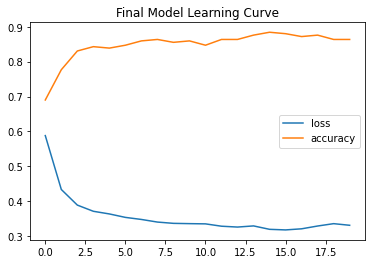

In [ ]:
# Plot learning curve dari model
pd.DataFrame(history.history).plot()
plt.title('Final Model Learning Curve')
plt.show()

### Predict test set

In [ ]:
# Standarisasi test set (scaling)
X_test_prepared = std_scale.transform(X_test)

In [ ]:
# Prediksi test set menggunakan model yang sudah di-train sebelumnya 
y_pred_proba = final_model.predict(X_test_prepared)
y_pred_proba[:5]

array([[0.85921645],
       [0.97251976],
       [0.03224513],
       [0.8476062 ],
       [0.9903429 ]], dtype=float32)

Output dari prediksi model berbentuk probabilitas, sehingga diperlukan threshold untuk menentukan apakah prediksi bernilai 0 atau 1

In [ ]:
# Ubah prediksi probabilitas menjadi nilai yang biner
y_pred = (y_pred_proba >= 0.5).astype(np.int)
y_pred[:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

Prediksi probabilitas diubah menjadi bernilai 0 dan 1 dengan threshold 0.5

In [ ]:
# Print hasil evaluasi model pada test set 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.84      0.93      0.88        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



Pada classification report diperoleh nilai precision, recall, f1-score, dan akurasi yang baik, yaitu: 

- Precision pada class 0 = 0.93
- Precision pada class 1 = 0.84
- Recall pada class 0 = 0.85
- Recall pada class 1 = 0.93
- F1-score pada class 0 = 0.89
- F1-score pada class 1 = 0.88
- Rata - rata precision dari kedua class = 0.89
- Rata - rata recall dari kedua class = 0.89
- Rata - rata f1-score dari kedua class = 0.89
- Akurasi = 0.89

# No 2

## Data Exploration

In [ ]:
# Membaca .txt tentang kolom - kolom dataset yang diberikan pada soal
with open('/content/readme.txt', 'r') as f:
  print(f.read())

About this file
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,b

In [ ]:
jamur_df = pd.read_csv('/content/Jamur.csv')  # inisiasi data Jamur.csv pada variabel jamur_df
jamur_df.head()                               # melihat 5 baris awal jamur_df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
jamur_df.info() # cek jumlah baris, kolom, tipe data, dan null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Didapatkan bahwa jamur_df memiliki 8124 baris dan 23 kolom, dimana semua kolomnya adalah bertipe kategorik, serta tidak terdapat null values pada data.

Karena semua kolom bertipe kategorik (termasuk target variablenya) sehingga perlu dilakukan encoding pada data preprocessing

## Data preprocessing

In [ ]:
# Encoding data
oe = OrdinalEncoder()                                   # insiasi ordinal encoder

jamur_df_encoded = jamur_df.copy()                      # jamur_df_encoded digunakan untuk menyimpan dataframe hasil encoding
jamur_df_encoded.loc[:,:] = oe.fit_transform(jamur_df)  # proses encoding data dan disimpan ke jamur_df_encoded
jamur_df_encoded = jamur_df_encoded.astype(np.int)      # mengubah hasil encoding menjadi integer (karena hasil fit_transform adalah float)
jamur_df_encoded.head()                                 # print 5 baris awal dari data hasil encoding

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [ ]:
# melihat class hasil encoding
for i,j in zip([0,1],oe.categories_[0]):
  print('index {0} adalah class: {1}'.format(i,j))

index 0 adalah class: e
index 1 adalah class: p


Diperoleh bahwa class dengan index 0 adalah e (edible/dapat dimakan) dan class dengan index 1 adalah p (poisonous/beracun)

In [ ]:
# melihat info data hasil encoding
jamur_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

Terlihat bahwa sekarang semua data sudah bertipe integer, sehingga dapat dilakukan modelling 

In [ ]:
X = jamur_df_encoded.drop('class', axis=1).values   # menyimpan predictor variable pada X
y = jamur_df_encoded['class'].values                # menyimpan target variable pada y

## Split train, validation, dan test set

In [ ]:
# split data menjadi full training set dan test set
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2)
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((6499, 22), (1625, 22), (6499,), (1625,))

In [ ]:
# split full training set menjadi training set dan validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.05)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((6174, 22), (325, 22), (6174,), (325,))

Diperoleh training set sejumlah 6174 sample, validation set 325 sample, dan test set sejumlah 1625 sample

## Modelling

In [ ]:
# Function untuk membuat model
def build_model(n_neurons=(20,), learning_rate=1e-3, activation_hidden='sigmoid'):
  model = keras.models.Sequential()                                                     # inisiasi arsitektur model
  model.add(keras.layers.InputLayer(input_shape=[22]))                                  # input layer
  for i in range(len(n_neurons)):                                                       # hidden layer
    model.add(keras.layers.Dense(n_neurons[i], activation=activation_hidden))
  model.add(keras.layers.Dense(1, activation='sigmoid'))                                # output layer
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)                        # optimizer yang akan digunakan
  model.compile(loss='binary_crossentropy', optimizer=optimizer,                        # compiling model
                metrics='accuracy')
  return model

Didefinisikan function build_model untuk membuat model, yang mengambil 3 argumen, yaitu n_neurons (jumlah hidden layer dan jumlah neuron pada masing - masing hidden layer, berbentuk tuple, dimana length dari tuple adalah banyaknya hidden layer dan nilai-nilai pada tuple adalah neurons pada hidden layer ke-index yang bersesuaian), learning_rate (learning rate saat proses learning algorithm), dan activation_hidden (fungsi aktivasi di hidden layer)

Pada function dibuat arsitektur model Sequential dengan input layer yang memiliki 22 neurons (karena terdapat 22 fitur pada predictor variable), hidden layer sebanyak yang didefinisikan user, dan output layer yang memiliki 1 neuron dengan fungsi aktivasi sigmoid. Model menggunakan cost function binary cross entropy/log loss, optimizer adam, dan metrik evaluasinya adalah akurasi.

Inisiasi awal model menggunakan 1 hidden layer dengan 20 neurons, learning rate = 0.001, fungsi aktivasi di hidden layer = sigmoid.

### Hyperparameter tuning

In [ ]:
# Wrapper model agar dapat dilakukan hyperparameter tuning dengan library scikit-learn
model = KerasClassifier(build_model, epochs=50, batch_size=64)

# tuning hyperparameter dengan randomized search
params = {'n_neurons':[(20,), (20,15), (30,), (30,20), (50,), (50,30), 
                       (70,), (70,50), (100,), (100,70)],
          'learning_rate':[1e-4, 1e-3, 1e-2],
          'activation_hidden':['relu','sigmoid','tanh'],
          'epochs':[50, 100, 150],
          'batch_size':[32, 64, 128, 256]}

rand_search = RandomizedSearchCV(model, params, cv=3, scoring='accuracy', 
                                 n_iter=20, verbose=2)
rand_search.fit(X_train, y_train, verbose=0)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END activation_hidden=relu, batch_size=32, epochs=50, learning_rate=0.0001, n_neurons=(30, 20); total time=  21.6s
[CV] END activation_hidden=relu, batch_size=32, epochs=50, learning_rate=0.0001, n_neurons=(30, 20); total time=   9.5s
[CV] END activation_hidden=relu, batch_size=32, epochs=50, learning_rate=0.0001, n_neurons=(30, 20); total time=  11.0s
[CV] END activation_hidden=relu, batch_size=256, epochs=150, learning_rate=0.0001, n_neurons=(50, 30); total time=   4.8s
[CV] END activation_hidden=relu, batch_size=256, epochs=150, learning_rate=0.0001, n_neurons=(50, 30); total time=   4.9s
[CV] END activation_hidden=relu, batch_size=256, epochs=150, learning_rate=0.0001, n_neurons=(50, 30); total time=   5.9s
[CV] END activation_hidden=sigmoid, batch_size=256, epochs=100, learning_rate=0.01, n_neurons=(100,); total time=   3.3s
[CV] END activation_hidden=sigmoid, batch_size=256, epochs=100, learning_rate=0.01, n_neuron

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ff929e135d0>,
                   n_iter=20,
                   param_distributions={'activation_hidden': ['relu', 'sigmoid',
                                                              'tanh'],
                                        'batch_size': [32, 64, 128, 256],
                                        'epochs': [50, 100, 150],
                                        'learning_rate': [0.0001, 0.001, 0.01],
                                        'n_neurons': [(20,), (20, 15), (30,),
                                                      (30, 20), (50,), (50, 30),
                                                      (70,), (70, 50), (100,),
                                                      (100, 70)]},
                   scoring='accuracy', verbose=2)

Hyperparameter yang dilakukan tuning adalah jumlah hidden layer, jumlah neuron di masing - masing hidden layer, learning rate, fungsi aktivasi di hidden layer, epochs, dan batch size

In [ ]:
# melihat hasil hyperparameter tuning
rs_result = pd.DataFrame(rand_search.cv_results_)
rs_result_df = rs_result.sort_values(['rank_test_score', 'mean_fit_time', 'mean_score_time'])[['param_n_neurons', 
                                                                                               'param_learning_rate', 
                                                                                               'param_activation_hidden', 
                                                                                               'param_epochs', 
                                                                                               'param_batch_size', 
                                                                                               'mean_test_score',
                                                                                               'mean_fit_time',
                                                                                               'mean_score_time', 
                                                                                               'rank_test_score']]
rs_result_df.head(10)

,param_n_neurons,param_learning_rate,param_activation_hidden,param_epochs,param_batch_size,mean_test_score,mean_fit_time,mean_score_time,rank_test_score
2,"(100,)",0.01,sigmoid,100,256,1.000000,4.011176,0.137887,1
16,"(20,)",0.01,relu,150,256,1.000000,4.585356,0.172863,1
9,"(50,)",0.001,relu,100,64,1.000000,10.411503,0.144772,1
13,"(100,)",0.01,relu,50,32,1.000000,10.832330,0.154494,1
8,"(30,)",0.001,relu,150,64,1.000000,13.722685,0.138830,1
12,"(50, 30)",0.01,tanh,150,64,1.000000,16.800249,0.154467,1
18,"(100, 70)",0.0001,tanh,150,64,1.000000,19.509196,0.160561,1
14,"(100, 70)",0.01,sigmoid,100,32,0.999838,20.915982,0.182006,8
7,"(100, 70)",0.0001,relu,150,128,0.999676,10.414967,0.173884,9
10,"(50,)",0.001,sigmoid,50,32,0.999352,10.837521,0.154345,10


Berdasarkan hyperparameter tuning, dapat kita lihat pada tabel diatas bahwa terdapat banyak kombinasi hyperparameter yang mendapatkan mean_test_score = 1. Sehingga saya akan menggunakan yang memiliki mean_fit_time dan mean_score_time terkecil (yaitu waktu training dan waktu prediksi model), yaitu model dengan 1 hidden layer dengan 100 neuron di hidden layernya, learning rate = 0.01, fungsi aktivasi di hidden layer = sigmoid, epochs = 100, dan batch size = 256

Sehingga akan digunakan model tersebut

### Training Model

Pada proses training model ini saya menggunakan wrapper pada model , karena nantinya saya akan menggunakan metode permutation importance untuk mencari fitur yang paling penting bagi model, yang dimana metode permutation importance dimiliki oleh library scikit-learn, sehingga harus digunakan wrapper pada model

In [ ]:
# Training model hasil hyperparameter tuning
stop_early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, verbose=1) # inisiasi early stopping
                                                                                      
final_model = KerasClassifier(build_model, n_neurons=(100,), learning_rate=0.01,      # membuat model final dengan hyperparameter hasil tuning
                              activation_hidden='sigmoid')
history = final_model.fit(X_train, y_train, epochs=100, batch_size=256,               # proses training
                          validation_data=(X_val, y_val), callbacks=[stop_early])

Epoch 1/100
25/25 [==============================] - 1s 9ms/step - loss: 0.5061 - accuracy: 0.7430 - val_loss: 0.3414 - val_accuracy: 0.8585
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8722 - val_loss: 0.2605 - val_accuracy: 0.8923
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2605 - accuracy: 0.9035 - val_loss: 0.2134 - val_accuracy: 0.9292
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9226 - val_loss: 0.1744 - val_accuracy: 0.9323
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1792 - accuracy: 0.9359 - val_loss: 0.1429 - val_accuracy: 0.9415
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9490 - val_loss: 0.1217 - val_accuracy: 0.9662
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1172 - accuracy: 0.9674 - val_loss: 0.0902 - val_accuracy: 0.9815
Epoch 8/100
2

Proses training berjalan hingga epochs terakhir (yaitu 100), sehingga early stopping tidak aktif karena val_loss terus mengalami penurunan hingga epochs terakhir

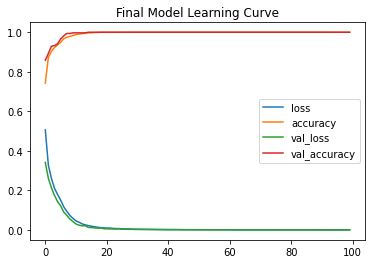

In [ ]:
# Plot learning curve proses training model
pd.DataFrame(history.history).plot()
plt.title('Final Model Learning Curve')
plt.show()

### Predict test set

In [ ]:
# prediksi test set dengan model hasil training
y_pred = final_model.predict(X_test)
y_pred[:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

Hasil prediksi sudah langsung berbentuk bilangan biner (tidak berbentuk probabilitas) karena model final menggunakan wrapper

In [ ]:
# print hasil evaluasi pada test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       869
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Pada classification report diperoleh nilai precision, recall, f1-score, dan akurasi yang sempurna, yaitu semuanya bernilai 1 (100%)

## Cek kepentingan fitur bagi prediksi model

Disini saya menggunakan metode permutation importance, yaitu metode untuk mengukur kepentingan fitur dengan menghitung peningkatan kesalahan prediksi model setelah mengubah fitur tersebut. Sebuah fitur “penting” jika mengacak nilainya meningkatkan kesalahan model, karena dalam hal ini model mengandalkan fitur untuk prediksi. Sebuah fitur dikatakan “tidak penting” jika mengacak nilainya membuat kesalahan model tidak berubah, karena dalam kasus ini model mengabaikan fitur untuk prediksi.

In [ ]:
# proses permutation importance
result = permutation_importance(final_model, X_val, y_val, n_repeats=10,  # permutation importance dilakukan pada data validasi
                                scoring='accuracy', random_state=42)

In [ ]:
# print hasil permutation importance
for i in result.importances_mean.argsort()[::-1]:
  print(f"{jamur_df.drop('class', axis=1).columns.values[i]:<30}"
        f"{result.importances_mean[i]:.3f}"
        f" +/- {result.importances_std[i]:.3f}")

odor                          0.066 +/- 0.011
gill-size                     0.064 +/- 0.007
spore-print-color             0.055 +/- 0.012
stalk-root                    0.048 +/- 0.012
gill-spacing                  0.048 +/- 0.009
habitat                       0.043 +/- 0.007
gill-color                    0.010 +/- 0.005
stalk-surface-above-ring      0.007 +/- 0.004
cap-surface                   0.007 +/- 0.005
stalk-shape                   0.003 +/- 0.002
veil-color                    0.003 +/- 0.003
stalk-color-above-ring        0.001 +/- 0.002
cap-color                     0.001 +/- 0.001
veil-type                     0.000 +/- 0.000
stalk-color-below-ring        0.000 +/- 0.000
stalk-surface-below-ring      0.000 +/- 0.000
population                    0.000 +/- 0.000
ring-number                   0.000 +/- 0.000
gill-attachment               0.000 +/- 0.000
ring-type                     0.000 +/- 0.000
bruises                       0.000 +/- 0.000
cap-shape                     0.00

Pada output diatas, diprint nilai kepentingan dan standard deviasinya dari masing - masing fitur (nilai sebelum tanda +/- adalah nilai kepentingan dan setelah +/- adalah standard deviasinya). Semakin besar nilai kepentingan, maka semakin penting fitur tersebut bagi akurasi model dalam memprediksi.

Sehingga dari hasil diatas dapat diambil kesimpulan bahwa fitur yang diduga kuat berkaitan dengan beracun atau tidaknya suatu jamur adalah odor, gill-size, spore-print-color, stalk-root, gill-spacing, dan habitat. Fitur setelah habitat memiliki nilai kepentingan yang berbeda cukup besar dengan fitur - fitur diatasnya, sehingga fitur - fitur setelahnya dapat dianggap tidak terlalu berpengaruh pada proses prediksi model.

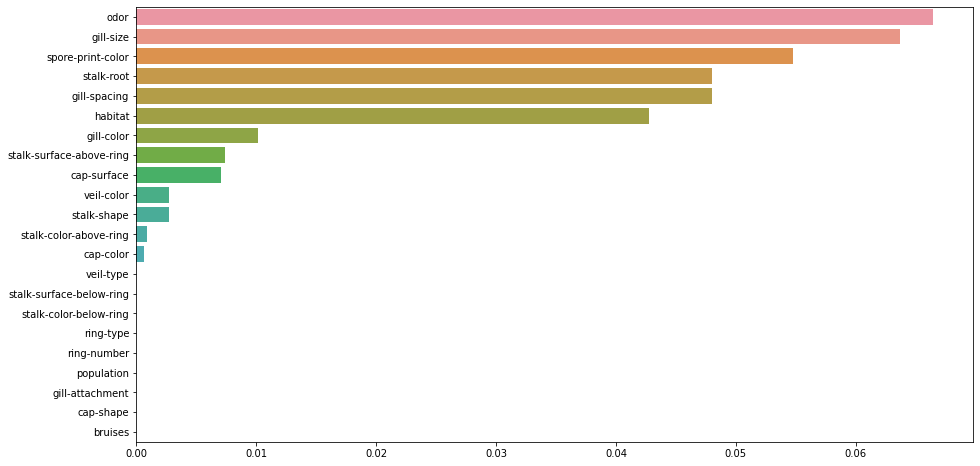

In [ ]:
# plot hasil permutation importance dengan bar plot
result_sorted = []
columns_sorted = []

for res, col in sorted(zip(result.importances_mean, jamur_df.drop('class', axis=1).columns.values), reverse=True):
  result_sorted.append(res)
  columns_sorted.append(col)

fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(result_sorted, columns_sorted, ax=ax)
plt.show()